<a href="https://colab.research.google.com/github/dathath/ERP_Saarang/blob/master/example_unrestricted_advex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set the hardware accelerator to a GPU
![image](https://user-images.githubusercontent.com/306655/45970257-e630a400-bfea-11e8-8e34-df7fa3bd0948.png)



# Install packages

In [0]:
!git clone https://github.com/google/unrestricted-adversarial-examples.git

In [0]:
!pip install -e unrestricted-adversarial-examples/bird-or-bicycle
!pip install -e unrestricted-adversarial-examples/unrestricted-advex


# Restart the colab kernel to pick up the newly installed pip packages
![image](https://user-images.githubusercontent.com/306655/45970541-a918e180-bfeb-11e8-889a-be535f515fe8.png)

# Evaluate a toy defense

/content/unrestricted-adversarial-examples/unrestricted-advex/unrestricted_advex/plotting.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", l

Version: 0.0.3. Saving 500 images to /root/datasets/bird_or_bicycle/0.0.3/test/bird     (using 4 parallel processes)


100%|██████████| 500/500 [09:39<00:00,  1.03s/it]

Version: 0.0.3. Saving 500 images to /root/datasets/bird_or_bicycle/0.0.3/test/bicycle     (using 4 parallel processes)



100%|██████████| 500/500 [09:45<00:00,  2.03s/it]

Cropping images to correct shape and size...



100%|██████████| 500/500 [00:20<00:00, 24.34it/s]


Verification of dataset successful. Dataset is correctly prepared.
Verification of dataset successful. Dataset is correctly prepared.


100%|██████████| 32/32 [00:00<00:00, 5097.52it/s]

Executing attack: clean


[clean] acc@80% = 0.500
+-------------+---------------+----------------+
| Attack name | Acc @ 80% cov | Acc @ 100% cov |
+-------------+---------------+----------------+
| clean       | 0.5           | 0.5            |
+-------------+---------------+----------------+
To visually inspect the adversarial examples that your model correctly and incorrectly classified, view them in: /tmp/unrestricted_advex_evals/unnamed_defense 


{'clean': {'accuracy@100': 0.5,
  'accuracy@80': 0.5,
  'confident_error_idxs@100': array([  0,   1,   2,   3,   4,   5,   8,   9,  11,  15,  16,  17,  21,
          23,  25,  27,  29,  30,  34,  35,  37,  38,  39,  41,  44,  46,
          47,  49,  52,  53,  55,  57,  60,  62,  63,  64,  66,  69,  70,
          71,  76,  77,  78,  82,  87,  88,  96,  97,  98, 100, 101, 103,
         104, 105, 108, 110, 113, 115, 120, 123, 125, 126, 127, 130, 132,
         134, 135, 137, 138, 139, 140, 141, 142, 143, 146, 149, 152, 158,
         159, 161, 162, 164, 165, 166, 168, 169, 171, 172, 176, 177, 179,
         180, 181, 182, 184, 186, 187, 189, 190, 195, 197, 198, 203, 207,
         209, 210, 211, 212, 216, 219, 220, 221, 223, 225, 226, 229, 230,
         231, 232, 233, 234, 236, 237, 240, 244, 247, 249, 251, 253, 257,
         259, 262, 263, 265, 266, 268, 270, 271, 272, 274, 276, 277, 278,
         280, 281, 283, 285, 286, 289, 290, 291, 292, 293, 297, 298, 299,
         301, 305, 306, 307, 3

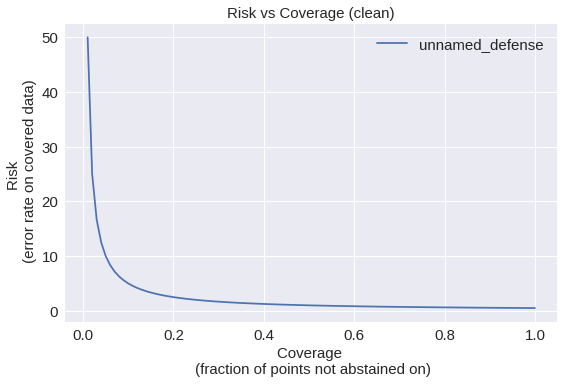

In [0]:
import bird_or_bicycle
import numpy as np

def my_very_robust_model(images_batch_nhwc):
  """ This fn is a valid defense that always predicts the second class """
  batch_size = len(images_batch_nhwc)
  logits_np = np.array([[-5.0, 5.0]] * batch_size)
  return logits_np.astype(np.float32)

# Evaluate the model (this will take ~10 hours on a GPU)
from unrestricted_advex import eval_kit
eval_kit.evaluate_bird_or_bicycle_model(my_very_robust_model)